<a href="https://colab.research.google.com/github/Eskdagoat/5105/blob/main/AndrewNicola_801136465_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Evaluation Metrics for Logistic Regression Model:
Accuracy:  0.6948
Precision: 0.5778
Recall:    0.4815
F1 Score:  0.5253


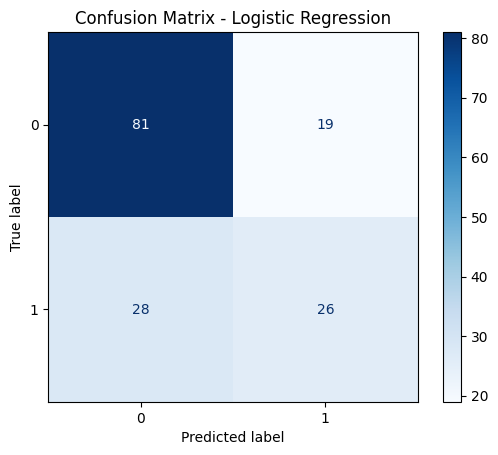


Evaluation Metrics for SGD Classifier Model:
Accuracy:  0.7078
Precision: 0.5692
Recall:    0.6852
F1 Score:  0.6218


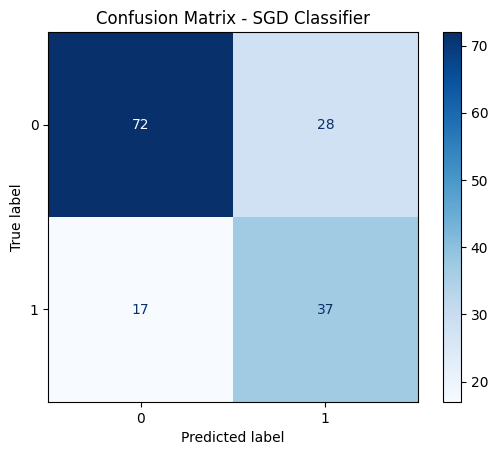

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# -------------------------------------------
# 1. Load the Dataset
# -------------------------------------------
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)

# 3.1 Handling Missing Values

# Replace zero values with NaN in certain columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.NaN)

# Impute missing values with mean of each column
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].mean())

# Verify that there are no missing values now

# -------------------------------------------
# 4. Feature Scaling and Standardization
# -------------------------------------------

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# -------------------------------------------
# 5. Split the Data
# -------------------------------------------

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------
# 6. Build and Train the Logistic Regression Model
# -------------------------------------------

# Initialize the Logistic Regression model
model = LogisticRegression(
    penalty='l2',
    solver='liblinear',  # Allows access to 'n_iter_' attribute
    random_state=42,
)

# Train the model
model.fit(X_train, y_train)

# -------------------------------------------
# 7. Evaluate the Model
# -------------------------------------------

# 7.1 Make Predictions
y_pred = model.predict(X_test)

# 7.2 Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics for Logistic Regression Model:")
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')

# -------------------------------------------
# 8. Plot Confusion Matrix
# -------------------------------------------

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# -------------------------------------------
# 9. Plot Training Results (Using SGDClassifier)
# -------------------------------------------

# Since LogisticRegression doesn't provide loss values over iterations, we use SGDClassifier
from sklearn.linear_model import SGDClassifier

# Number of epochs
n_epochs = 50

# Initialize lists to store loss and accuracy
loss_list = []
accuracy_list = []

# Create copies of training data
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

# Initialize the SGDClassifier with logistic loss
sgd_model = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    max_iter=1,  # We will manually control the number of iterations
    learning_rate='optimal',
    tol=None,
    random_state=42,
    warm_start=True,
)

# Initialize model weights
sgd_model.fit(X_train_copy[:10], y_train_copy[:10])

for epoch in range(n_epochs):
    # Shuffle the data at each epoch
    idx = np.random.permutation(len(X_train_copy))
    X_train_copy, y_train_copy = X_train_copy[idx], y_train_copy.iloc[idx]

    # Partial fit on the entire dataset
    sgd_model.partial_fit(X_train_copy, y_train_copy, classes=np.unique(y_train))

    # Predict on training data
    y_train_pred = sgd_model.predict(X_train_copy)

    # Calculate log loss
    probabilities = sgd_model._predict_proba_lr(X_train_copy)
    log_loss = -np.mean(
        y_train_copy * np.log(probabilities[:, 1] + 1e-15) +
        (1 - y_train_copy) * np.log(probabilities[:, 0] + 1e-15)
    )
    loss_list.append(log_loss)

    # Calculate accuracy
    acc = accuracy_score(y_train_copy, y_train_pred)
    accuracy_list.append(acc)



# -------------------------------------------
# 10. Evaluate SGD Model on Test Set
# -------------------------------------------

# Predict on the test set
y_pred_sgd = sgd_model.predict(X_test)

# Calculate Metrics
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

print("\nEvaluation Metrics for SGD Classifier Model:")
print(f'Accuracy:  {accuracy_sgd:.4f}')
print(f'Precision: {precision_sgd:.4f}')
print(f'Recall:    {recall_sgd:.4f}')
print(f'F1 Score:  {f1_sgd:.4f}')

# -------------------------------------------
# 11. Plot Confusion Matrix for SGD Model
# -------------------------------------------

# Compute confusion matrix
cm_sgd = confusion_matrix(y_test, y_pred_sgd, labels=sgd_model.classes_)

# Display confusion matrix
disp_sgd = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=sgd_model.classes_)
disp_sgd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SGD Classifier')
plt.show()



Accuracy:  0.9649
Precision: 0.9722
Recall:    0.9722
F1 Score:  0.9722


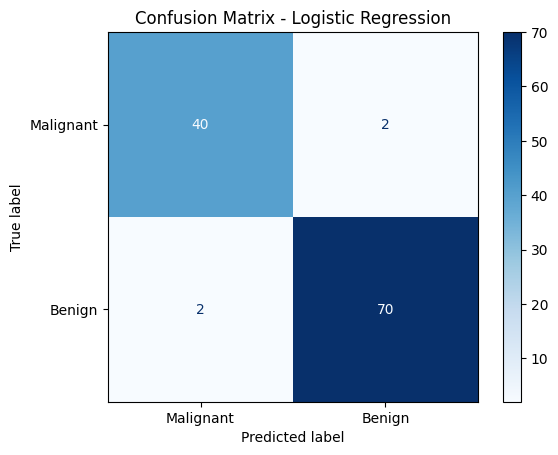


Accuracy (Regularized):  0.9825
Precision (Regularized): 0.9861
Recall (Regularized):    0.9861
F1 Score (Regularized):  0.9861


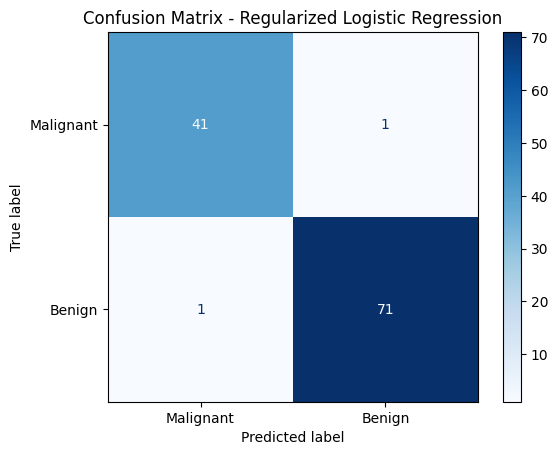


Comparison of Models:
Metric         Without Regularization   With Regularization      
-----------------------------------------------------------------
Accuracy       0.9649                     0.9825
Precision      0.9722                     0.9861
Recall         0.9722                     0.9861
F1 Score       0.9722                     0.9861


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# -------------------------------------------
# 1. Load the Cancer Dataset
# -------------------------------------------
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# -------------------------------------------
# 3. Data Preprocessing
# -------------------------------------------
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# -------------------------------------------
# 4. Split the Data
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------
# 5. Build and Train the Logistic Regression Model (Without Regularization)
# -------------------------------------------
model = LogisticRegression(
    penalty= None ,
    solver='saga',
    max_iter=10000,
    random_state=42,
)
model.fit(X_train, y_train)

# -------------------------------------------
# 6. Evaluate the Model
# -------------------------------------------
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nAccuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# -------------------------------------------
# 7. Add a Weight Penalty (Regularization) and Repeat Training
# -------------------------------------------
model_reg = LogisticRegression(
    penalty='l2',        # L2 regularization
    C=1.0,               # Regularization strength
    solver='saga',
    max_iter=10000,
    random_state=42,
)
model_reg.fit(X_train, y_train)

# Evaluate the Regularized Model
y_pred_reg = model_reg.predict(X_test)

# Metrics
accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg)
recall_reg = recall_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

print(f'\nAccuracy (Regularized):  {accuracy_reg:.4f}')
print(f'Precision (Regularized): {precision_reg:.4f}')
print(f'Recall (Regularized):    {recall_reg:.4f}')
print(f'F1 Score (Regularized):  {f1_reg:.4f}')

# Confusion Matrix for Regularized Model
cm_reg = confusion_matrix(y_test, y_pred_reg, labels=model_reg.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=['Malignant', 'Benign'])
disp_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Regularized Logistic Regression')
plt.show()

# -------------------------------------------
# 8. Compare the Results
# -------------------------------------------
print("\nComparison of Models:")
print(f"{'Metric':<15}{'Without Regularization':<25}{'With Regularization':<25}")
print(f"{'-'*65}")
print(f"{'Accuracy':<15}{accuracy:.4f}{'':<21}{accuracy_reg:.4f}")
print(f"{'Precision':<15}{precision:.4f}{'':<21}{precision_reg:.4f}")
print(f"{'Recall':<15}{recall:.4f}{'':<21}{recall_reg:.4f}")
print(f"{'F1 Score':<15}{f1:.4f}{'':<21}{f1_reg:.4f}")




Accuracy (Naive Bayes):  0.9298
Precision (Naive Bayes): 0.9444
Recall (Naive Bayes):    0.9444
F1 Score (Naive Bayes):  0.9444


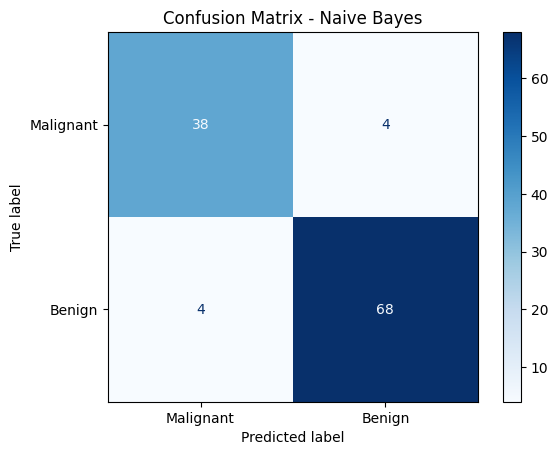


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

   Malignant       0.90      0.90      0.90        42
      Benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Comparison of Naive Bayes and Logistic Regression:
      Metric  Naive Bayes  Logistic Regression
0   Accuracy     0.929825             0.982456
1  Precision     0.944444             0.986111
2     Recall     0.944444             0.986111
3   F1 Score     0.944444             0.986111


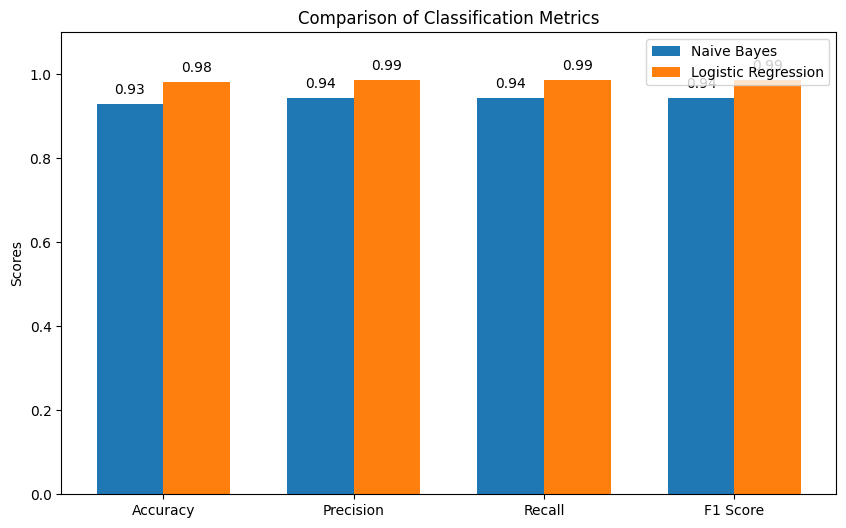

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

# -------------------------------------------
# 1. Load the Cancer Dataset
# -------------------------------------------
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# -------------------------------------------
# 2. Data Preprocessing
# -------------------------------------------
X = df.drop('target', axis=1)
y = df['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# -------------------------------------------
# 3. Split the Data
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------
# 4. Build and Train the Naive Bayes Model
# -------------------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# -------------------------------------------
# 5. Evaluate the Naive Bayes Model
# -------------------------------------------
y_pred_nb = nb_model.predict(X_test)

# Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f'\nAccuracy (Naive Bayes):  {accuracy_nb:.4f}')
print(f'Precision (Naive Bayes): {precision_nb:.4f}')
print(f'Recall (Naive Bayes):    {recall_nb:.4f}')
print(f'F1 Score (Naive Bayes):  {f1_nb:.4f}')

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Malignant', 'Benign'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Classification Report
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=['Malignant', 'Benign']))

# -------------------------------------------
# 6. Logistic Regression Model (From Problem 2)
# -------------------------------------------
logreg_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='saga',
    max_iter=10000,
    random_state=42,
)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# -------------------------------------------
# 7. Comparison of Models
# -------------------------------------------
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    'Logistic Regression': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
})

print("\nComparison of Naive Bayes and Logistic Regression:")
print(comparison_df)

# Plotting the comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, logreg_scores, width, label='Logistic Regression')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim([0, 1.1])
plt.show()


Optimal number of principal components: 18
Highest classification accuracy: 0.9825


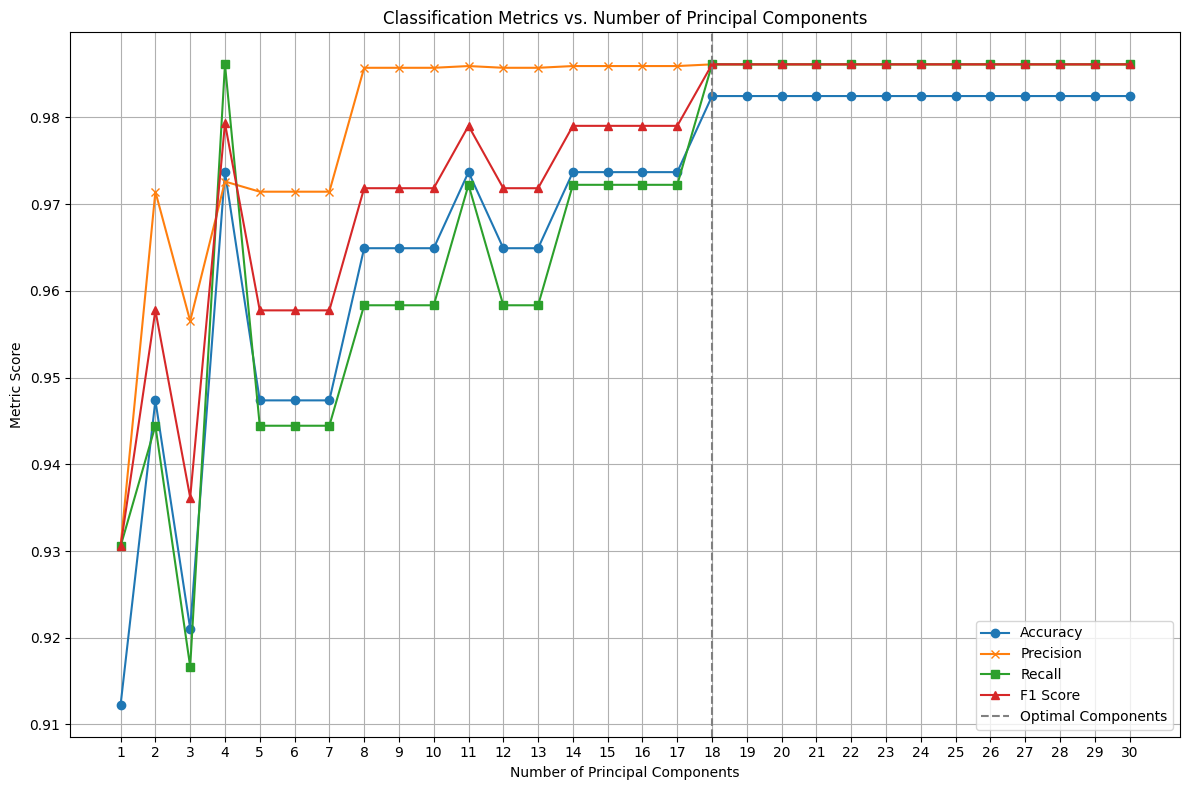

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variables to store metrics
max_components = X.shape[1]
components_range = range(1, max_components + 1)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop over different numbers of principal components
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train logistic regression model
    model = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='saga',
        max_iter=10000,
        random_state=42,
    )
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Identify the optimal number of components
optimal_index = np.argmax(accuracy_list)
optimal_components = components_range[optimal_index]
optimal_accuracy = accuracy_list[optimal_index]

print(f"Optimal number of principal components: {optimal_components}")
print(f"Highest classification accuracy: {optimal_accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(components_range, accuracy_list, label='Accuracy', marker='o')
plt.plot(components_range, precision_list, label='Precision', marker='x')
plt.plot(components_range, recall_list, label='Recall', marker='s')
plt.plot(components_range, f1_list, label='F1 Score', marker='^')

plt.axvline(x=optimal_components, color='grey', linestyle='--', label='Optimal Components')

plt.title('Classification Metrics vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
plt.xticks(components_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Optimal number of principal components: 6
Highest classification accuracy: 0.9386


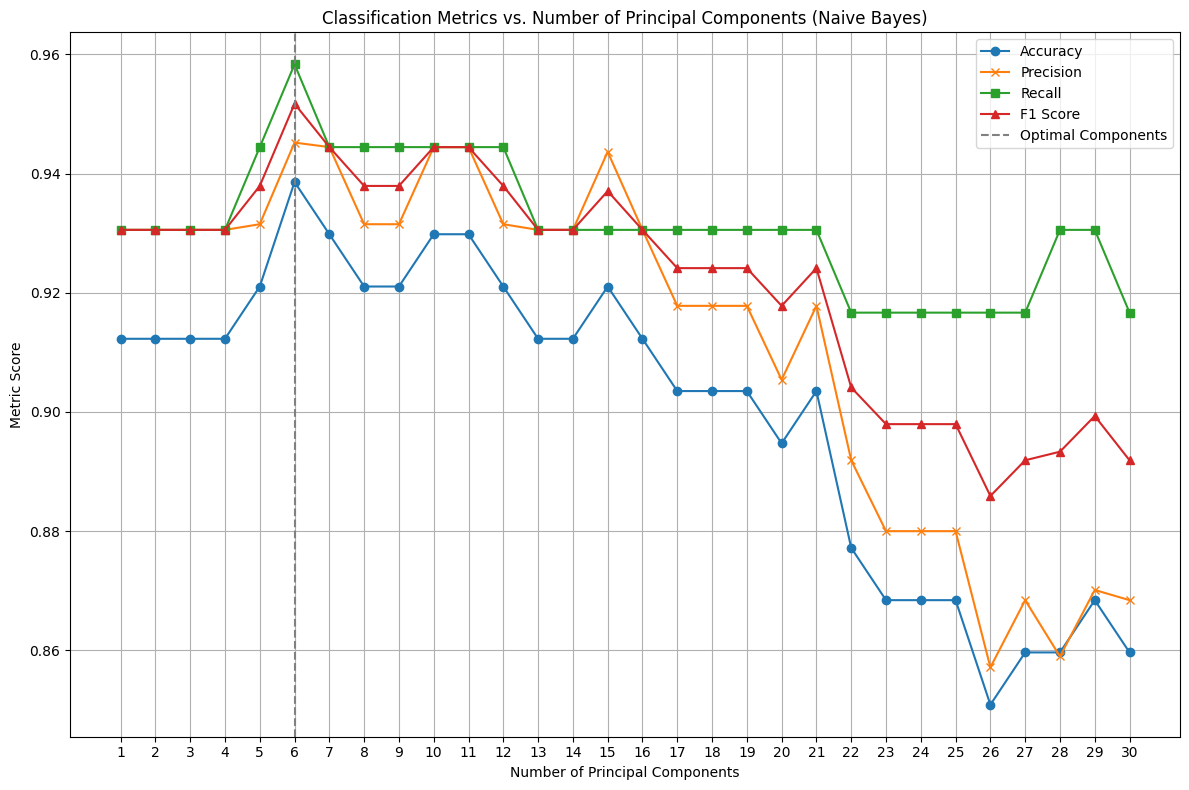

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variables to store metrics
max_components = X.shape[1]
components_range = range(1, max_components + 1)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop over different numbers of principal components
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Identify the optimal number of components
optimal_index = np.argmax(accuracy_list)
optimal_components = components_range[optimal_index]
optimal_accuracy = accuracy_list[optimal_index]

print(f"Optimal number of principal components: {optimal_components}")
print(f"Highest classification accuracy: {optimal_accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(components_range, accuracy_list, label='Accuracy', marker='o')
plt.plot(components_range, precision_list, label='Precision', marker='x')
plt.plot(components_range, recall_list, label='Recall', marker='s')
plt.plot(components_range, f1_list, label='F1 Score', marker='^')

plt.axvline(x=optimal_components, color='grey', linestyle='--', label='Optimal Components')

plt.title('Classification Metrics vs. Number of Principal Components (Naive Bayes)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
plt.xticks(components_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
